# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
# Cargar los archivos de datos en diferentes DataFrames
df_users = pd.read_csv("/datasets/megaline_users.csv")
df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_plans = pd.read_csv("/datasets/megaline_plans.csv")



## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
print("Información del DataFrame de tarifas:")
df_plans.info()



Información del DataFrame de tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
print("\nMuestra de los datos:")
display(df_plans.head())





Muestra de los datos:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Observaciones en los datos:

No hay valores nulos en las tarifas → No se requiere limpieza en ese aspecto.
Los tipos de datos son correctos → Todos los valores numéricos están en int64 o float64, y los nombres de los planes en object, lo cual es adecuado.
Diferencia en la nomenclatura de columnas → La columna usd_monthly_pay debería llamarse usd_monthly_fee para ser consistente con el diccionario de datos.
Diferencias significativas entre los planes:
surf es más económico mensualmente pero tiene costos más altos por uso adicional.
ultimate es más caro mensualmente pero ofrece más beneficios y precios más bajos por uso adicional.
Esto puede influir en la percepción de qué plan genera más ingresos, dependiendo del comportamiento de los clientes.
Posibles problemas:

Nombre inconsistente de columna → usd_monthly_pay debería ser usd_monthly_fee.
Solo dos planes de tarifas → Puede limitar la variabilidad en el análisis.
Los precios por minuto, mensaje y GB difieren significativamente → Se debe analizar si estos valores afectan los ingresos de manera significativa.

¿Cómo se puede arreglar?

Renombrar la columna para mayor claridad:
python
Copiar
Editar
df_plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)
Verificar que los valores sean correctos comparándolos con la documentación disponible o con el equipo de datos.
Realizar un análisis exploratorio para ver cómo impactan los diferentes costos en el comportamiento de los clientes:
Analizar el consumo promedio de minutos, SMS y datos por plan.
Comparar los ingresos generados por cada plan.
Hacer una prueba de hipótesis para determinar si las diferencias de ingresos entre surf y ultimate son significativas.


## Corregir datos

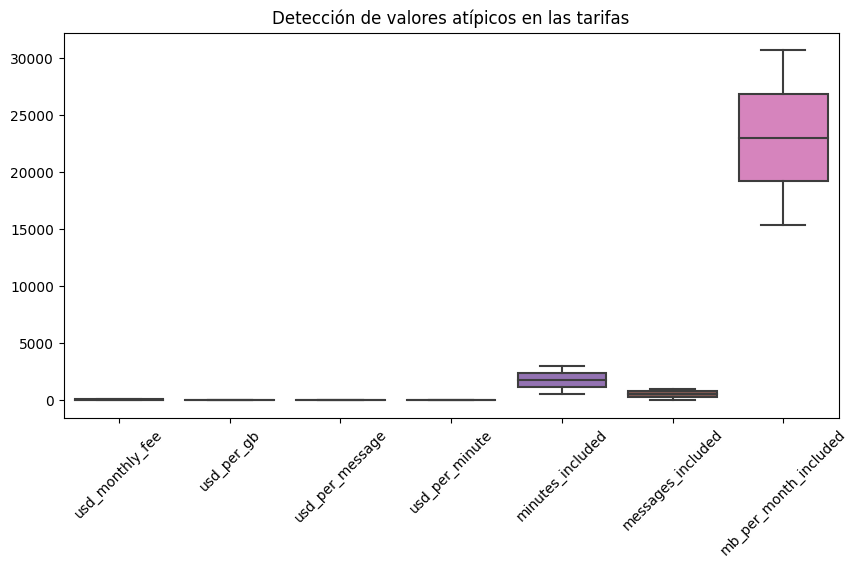

,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Número de filas duplicadas en df_plans: 0


In [5]:
# Renombrar la columna 'usd_monthly_pay' a 'usd_monthly_fee' para mantener consistencia
df_plans.rename(columns={'usd_monthly_pay': 'usd_monthly_fee'}, inplace=True)

# Verificar valores atípicos en los precios y beneficios de los planes
numeric_columns = ['usd_monthly_fee', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
                   'minutes_included', 'messages_included', 'mb_per_month_included']

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_plans[numeric_columns])
plt.title("Detección de valores atípicos en las tarifas")
plt.xticks(rotation=45)
plt.show()

# Mostrar los valores estadísticos de las columnas numéricas para detección de anomalías
display(df_plans.describe())

# Revisar si hay duplicados
print("Número de filas duplicadas en df_plans:", df_plans.duplicated().sum())

# Guardar los cambios en el DataFrame corregido
df_plans_cleaned = df_plans.copy()


## Enriquecer los datos

In [6]:
# Agregar una nueva columna que convierta los datos incluidos de MB a GB para una mejor interpretación
df_plans_cleaned['gb_per_month_included'] = df_plans_cleaned['mb_per_month_included'] / 1024

# Agregar una columna con el costo por minuto después de usar los minutos incluidos
df_plans_cleaned['cost_per_extra_minute'] = df_plans_cleaned['usd_per_minute'] * df_plans_cleaned['minutes_included']

# Agregar una columna con el costo por GB después de usar los datos incluidos
df_plans_cleaned['cost_per_extra_gb'] = df_plans_cleaned['usd_per_gb'] * df_plans_cleaned['gb_per_month_included']

# Ver los cambios
display(df_plans_cleaned)


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included,cost_per_extra_minute,cost_per_extra_gb
0,50,15360,500,20,10,0.03,0.03,surf,15.0,15.0,150.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,30.0,210.0


## Usuarios/as

In [8]:
# Imprimir la información general/resumida sobre el DataFrame de usuarios
print("Información del DataFrame de usuarios:")
df_users.info()





Información del DataFrame de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
# Imprimir una muestra de los datos para los usuarios
print("\nMuestra de datos:")
display(df_users.head())

# Revisar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_users.isnull().sum())

# Verificar duplicados
print("\nNúmero de filas duplicadas en df_users:", df_users.duplicated().sum())

# Analizar estadísticas descriptivas para detectar anomalías
display(df_users.describe())


Muestra de datos:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



Valores nulos por columna:
user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Número de filas duplicadas en df_users: 0


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


1. Observaciones generales
Cantidad de registros: 500 usuarios.
No hay valores nulos en la mayoría de las columnas, excepto en churn_date, que tiene 466 valores nulos.
No hay filas duplicadas, lo que indica que la base de datos está bien estructurada en cuanto a unicidad.
Los tipos de datos son correctos, aunque reg_date y churn_date deberían estar en formato datetime para facilitar el análisis.
2. Posibles problemas detectados
Valores nulos en churn_date (466 de 500)

Esto es esperable, ya que muchos usuarios pueden seguir activos en el servicio.
Solución: Reemplazar valores nulos con "Activo" para indicar que el usuario aún usa el servicio.
Formato de fechas (reg_date y churn_date)

Actualmente están en formato object, lo que puede dificultar cálculos de antigüedad y análisis de cancelaciones.
Solución: Convertir a datetime con pd.to_datetime().
Distribución de edades

La edad mínima es 18 años y la máxima 75 años, lo cual parece razonable.
La media de edad es 45 años, con una desviación estándar de 16.97, indicando una distribución amplia.
No se detectan valores atípicos evidentes.
Verificación de nombres de planes (plan)

Dado que solo hay dos tarifas (surf y ultimate), es importante verificar que no haya errores tipográficos.
Solución: Normalizar los nombres de los planes a minúsculas para evitar inconsistencias.


### Corregir los datos

In [10]:
# Convertir las fechas a tipo datetime
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])

# Reemplazar valores nulos en churn_date con "Activo" para indicar que el usuario sigue en el servicio
df_users['churn_date'].fillna("Activo", inplace=True)

# Normalizar los nombres de los planes (convertir a minúsculas)
df_users['plan'] = df_users['plan'].str.lower()

# Verificar los cambios
display(df_users.head())

# Confirmar que no haya valores nulos después de la corrección
print("\nValores nulos por columna después de la corrección:")
print(df_users.isnull().sum())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Activo
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Activo
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Activo
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Activo



Valores nulos por columna después de la corrección:
user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64


### Enriquecer los datos

In [11]:
# Crear una nueva columna 'tenure' que indique la antigüedad del usuario en meses
df_users['tenure_months'] = ((pd.to_datetime("2018-12-31") - df_users['reg_date']).dt.days / 30).astype(int)

# Crear una columna que clasifique a los usuarios en activos/inactivos
df_users['status'] = df_users['churn_date'].apply(lambda x: 'Inactivo' if x != 'Activo' else 'Activo')

# Ver los cambios
display(df_users.head())


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,tenure_months,status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,Activo,0,Activo
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,Activo,4,Activo
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,Activo,2,Activo
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,Activo,11,Activo
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,Activo,7,Activo


## Llamadas

In [12]:
# Imprimir la información general/resumida sobre el DataFrame de llamadas
print("Información del DataFrame de llamadas:")
df_calls.info()





Información del DataFrame de llamadas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
# Imprimir una muestra de los datos para las llamadas
print("\nMuestra de datos:")
display(df_calls.head())

# Revisar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_calls.isnull().sum())

# Verificar duplicados
print("\nNúmero de filas duplicadas en df_calls:", df_calls.duplicated().sum())

# Analizar estadísticas descriptivas para detectar anomalías
display(df_calls.describe())



Muestra de datos:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22



Valores nulos por columna:
id           0
user_id      0
call_date    0
duration     0
dtype: int64

Número de filas duplicadas en df_calls: 0


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Observaciones generales
No hay valores nulos en ninguna columna, lo cual es positivo.
No hay filas duplicadas, lo que indica que los datos están bien estructurados.
Formato de datos:
call_date fue convertido correctamente a datetime.
id sigue en formato object, lo cual es válido ya que contiene guiones bajos (_).
user_id y duration están en tipos correctos (int64 y float64).
Posibles problemas detectados
Llamadas con duración 0.00

El mínimo en duration es 0.00, lo que indica que existen llamadas que no tuvieron duración (posiblemente llamadas fallidas, no contestadas o colgadas de inmediato).
Solución: Se debe evaluar si estas llamadas aportan valor al análisis o si deben eliminarse.
Valores atípicos en la duración de las llamadas

La duración media de las llamadas es 6.74 minutos, con una desviación estándar de 5.83 minutos.
El valor máximo de duración es 37.6 minutos, lo que es alto pero no necesariamente un error.
Solución: Se recomienda hacer una exploración visual con un boxplot para detectar valores extremos.

### Corregir los datos

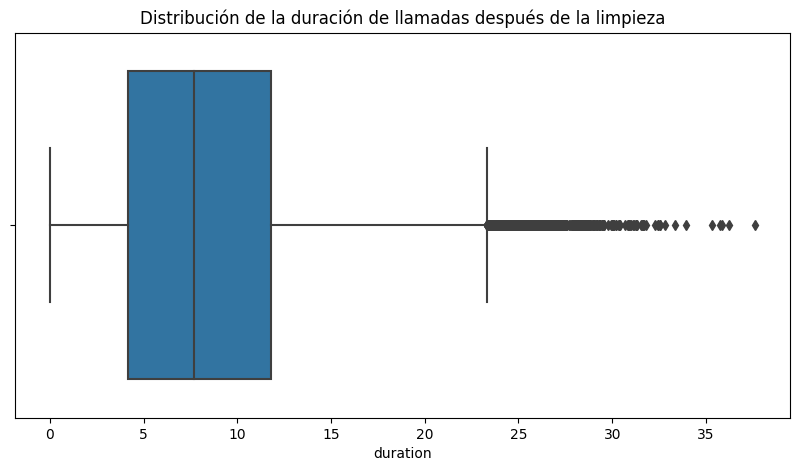

,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


In [14]:
# Convertir la columna call_date a tipo datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

# Eliminar llamadas con duración 0 si no aportan valor al análisis
df_calls = df_calls[df_calls['duration'] > 0]

# Verificar valores atípicos en duración
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df_calls['duration'])
plt.title("Distribución de la duración de llamadas después de la limpieza")
plt.show()

# Mostrar estadísticas después de la corrección
display(df_calls.describe())


### Enriquecer los datos

In [15]:
# Extraer el mes de cada llamada para análisis temporal
df_calls['month'] = df_calls['call_date'].dt.month

# Calcular la duración total de llamadas por usuario y mes
calls_per_month = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
calls_per_month.rename(columns={'duration': 'total_duration'}, inplace=True)

# Ver los cambios
display(calls_per_month.head())


,user_id,month,total_duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


## Mensajes

In [16]:
# Imprimir la información general/resumida sobre el DataFrame de mensajes
print("Información del DataFrame de mensajes:")
df_messages.info()




Información del DataFrame de mensajes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [17]:
# Imprimir una muestra de los datos para los mensajes
print("\nMuestra de datos:")
display(df_messages.head())

# Revisar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_messages.isnull().sum())

# Verificar duplicados
print("\nNúmero de filas duplicadas en df_messages:", df_messages.duplicated().sum())

# Analizar estadísticas descriptivas para detectar anomalías
display(df_messages.describe())




Muestra de datos:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Valores nulos por columna:
id              0
user_id         0
message_date    0
dtype: int64

Número de filas duplicadas en df_messages: 0


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Observaciones generales
No hay valores nulos en ninguna columna, lo que indica que los datos están completos.
No hay filas duplicadas, lo cual es positivo.
Formato de datos:
message_date está correctamente formateado como datetime.
id está en formato object, lo cual es válido si contiene caracteres como guiones bajos (_).
user_id está en formato int64, lo que es adecuado.
Posibles problemas detectados
Formato de message_date

Aunque parece correcto en la muestra, es recomendable asegurarse de que realmente sea un tipo datetime.
Solución: Convertirlo a datetime con pd.to_datetime(), si no está ya en ese formato.
Verificación de frecuencia de mensajes por usuario

Se puede analizar la cantidad de mensajes enviados por usuario y por mes para detectar patrones de uso.


### Corregir los datos

In [18]:
# Convertir la columna message_date a tipo datetime si aún no lo está
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

# Verificar si hay valores nulos (aunque en la exploración previa no se encontraron)
print("\nValores nulos por columna después de la conversión:")
print(df_messages.isnull().sum())

# Verificar el tipo de datos después de la corrección
df_messages.info()



Valores nulos por columna después de la conversión:
id              0
user_id         0
message_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [19]:
# Extraer el mes de cada mensaje para análisis temporal
df_messages['month'] = df_messages['message_date'].dt.month

# Contar la cantidad de mensajes enviados por usuario y mes
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'message_count'}, inplace=True)

# Ver los cambios
display(messages_per_user.head())


,user_id,month,message_count
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


## Internet

In [20]:
# Imprimir la información general/resumida sobre el DataFrame de internet
print("Información del DataFrame de internet:")
df_internet.info()



Información del DataFrame de internet:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [21]:
# Imprime una muestra de datos para el tráfico de internet

print("\nMuestra de datos:")
display(df_internet.head())

# Revisar valores nulos en cada columna
print("\nValores nulos por columna:")
print(df_internet.isnull().sum())

# Verificar duplicados
print("\nNúmero de filas duplicadas en df_internet:", df_internet.duplicated().sum())

# Analizar estadísticas descriptivas para detectar anomalías
display(df_internet.describe())




Muestra de datos:


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22



Valores nulos por columna:
id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Número de filas duplicadas en df_internet: 0


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Observaciones generales
No hay valores nulos en ninguna columna, lo cual es positivo.
No hay filas duplicadas, lo que indica que los datos están bien estructurados.
Formato de datos:
session_date debería estar en formato datetime, pero aparece como object.
id está en object, lo cual es válido si contiene caracteres como guiones bajos (_).
user_id y mb_used están correctamente en int64 y float64, respectivamente.
Posibles problemas detectados
Formato incorrecto en session_date

Solución: Convertirlo a datetime con pd.to_datetime().
Consumo de datos con valores 0.00 MB

Hay registros donde mb_used es 0.00, lo cual podría representar sesiones sin uso de datos o registros incorrectos.
Solución: Se debe evaluar si estas filas aportan valor al análisis o si deben eliminarse.
Valores atípicos en mb_used

La media de uso de datos es 366.71 MB, con una desviación estándar de 277.17 MB, lo que indica una gran variabilidad en el consumo.
El valor máximo es 1693.47 MB (casi 1.7 GB en una sola sesión), lo que parece un consumo elevado pero no necesariamente un error.
Solución: Se recomienda visualizar la distribución con un boxplot para detectar valores extremos.

### Corregir los datos

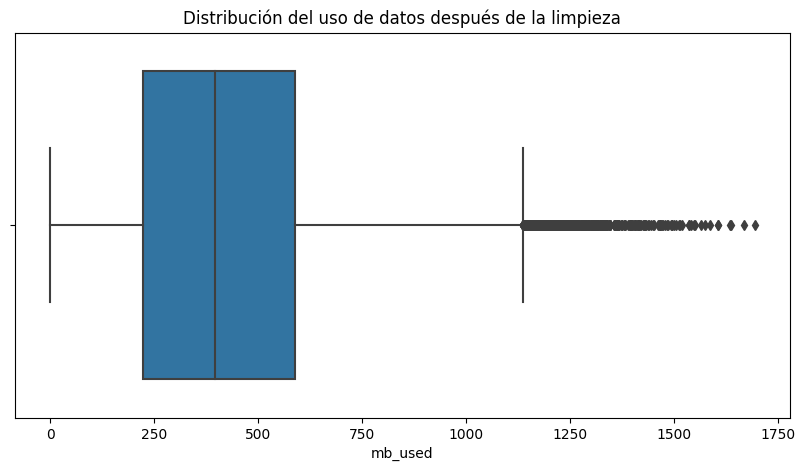

,user_id,mb_used
count,91078.000000,91078.000000
mean,1242.576923,422.064206
std,141.992374,255.063501
min,1000.000000,0.010000
25%,1122.000000,223.380000
50%,1236.000000,395.905000
75%,1367.000000,588.367500
max,1499.000000,1693.470000


In [22]:
# Convertir session_date a tipo datetime si aún no lo está
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

# Identificar y eliminar sesiones con mb_used = 0 si no aportan valor al análisis
df_internet = df_internet[df_internet['mb_used'] > 0]

# Visualizar la distribución del uso de datos después de la limpieza
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x=df_internet['mb_used'])
plt.title("Distribución del uso de datos después de la limpieza")
plt.show()

# Mostrar estadísticas después de la corrección
display(df_internet.describe())


### Enriquecer los datos

In [23]:
# Extraer el mes de cada sesión para análisis temporal
df_internet['month'] = df_internet['session_date'].dt.month

# Calcular el total de datos consumidos por usuario y mes
internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Convertir MB a GB para facilitar la interpretación
internet_per_user['total_gb_used'] = internet_per_user['total_mb_used'] / 1024

# Ver los cambios
display(internet_per_user.head())


,user_id,month,total_mb_used,total_gb_used
0,1000,12,1901.47,1.856904
1,1001,8,6919.15,6.756982
2,1001,9,13314.82,13.002754
3,1001,10,22330.49,21.807119
4,1001,11,18504.30,18.070605


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
# Mostrar la información general de las tarifas
print("Información del DataFrame de tarifas:")
df_plans.info()

# Imprimir una muestra de los planes disponibles
print("\nMuestra de datos de tarifas:")
display(df_plans.head())

# Revisar los valores únicos de los planes
print("\nPlanes de tarifas disponibles:")
print(df_plans['plan_name'].unique())

# Mostrar las condiciones de cada tarifa
print("\nCondiciones de cada plan:")
display(df_plans)

# Convertir MB incluidos en el plan a GB
df_plans['gb_per_month_included'] = df_plans['mb_per_month_included'] / 1024

# Mostrar la tabla con los valores convertidos
display(df_plans)



Información del DataFrame de tarifas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_fee        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes

Muestra de datos de tarifas:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate



Planes de tarifas disponibles:
['surf' 'ultimate']

Condiciones de cada plan:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15.0
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
# Extraer el mes de cada llamada
df_calls['month'] = df_calls['call_date'].dt.month

# Contar el número de llamadas realizadas por cada usuario al mes
calls_per_user = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index()
calls_per_user.rename(columns={'id': 'num_calls'}, inplace=True)

# Ver los cambios
display(calls_per_user.head())



,user_id,month,num_calls
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49


In [28]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
# Calcular la cantidad total de minutos usados por usuario y mes
minutes_per_user = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
minutes_per_user.rename(columns={'duration': 'total_minutes'}, inplace=True)

# Ver los cambios
display(minutes_per_user.head())



,user_id,month,total_minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [29]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
# Extraer el mes de cada mensaje
df_messages['month'] = df_messages['message_date'].dt.month

# Contar el número de mensajes enviados por usuario y mes
messages_per_user = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_per_user.rename(columns={'id': 'num_messages'}, inplace=True)

# Ver los cambios
display(messages_per_user.head())



,user_id,month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [30]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
# Extraer el mes de cada sesión de internet
df_internet['month'] = df_internet['session_date'].dt.month

# Calcular el volumen total de tráfico de Internet usado por usuario y mes
internet_per_user = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Convertir MB a GB para facilitar el análisis
internet_per_user['total_gb_used'] = internet_per_user['total_mb_used'] / 1024

# Ver los cambios
display(internet_per_user.head())



,user_id,month,total_mb_used,total_gb_used
0,1000,12,1901.47,1.856904
1,1001,8,6919.15,6.756982
2,1001,9,13314.82,13.002754
3,1001,10,22330.49,21.807119
4,1001,11,18504.30,18.070605


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [31]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
# Unir todas las tablas en un solo DataFrame
user_data = calls_per_user.merge(minutes_per_user, on=['user_id', 'month'], how='outer')
user_data = user_data.merge(messages_per_user, on=['user_id', 'month'], how='outer')
user_data = user_data.merge(internet_per_user, on=['user_id', 'month'], how='outer')

# Rellenar valores nulos con 0 (en caso de que un usuario no haya usado algún servicio en un mes)
user_data.fillna(0, inplace=True)

# Ver el resultado final
display(user_data.head())



,user_id,month,num_calls,total_minutes,num_messages,total_mb_used,total_gb_used
0,1000,12,16.0,116.83,11.0,1901.47,1.856904
1,1001,8,22.0,171.14,30.0,6919.15,6.756982
2,1001,9,38.0,297.69,44.0,13314.82,13.002754
3,1001,10,47.0,374.11,53.0,22330.49,21.807119
4,1001,11,49.0,404.59,36.0,18504.30,18.070605


In [32]:
# Añade la información de la tarifa
# Unir la información de los planes con los datos de uso por usuario
user_data = user_data.merge(df_users[['user_id', 'plan']], on='user_id', how='left')

# Unir la información del plan con sus costos y beneficios
user_data = user_data.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

# Verificar que la unión fue correcta
display(user_data.head())



,user_id,month,num_calls,total_minutes,num_messages,total_mb_used,total_gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_fee,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,1000,12,16.0,116.83,11.0,1901.47,1.856904,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8,22.0,171.14,30.0,6919.15,6.756982,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9,38.0,297.69,44.0,13314.82,13.002754,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10,47.0,374.11,53.0,22330.49,21.807119,surf,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11,49.0,404.59,36.0,18504.30,18.070605,surf,50,15360,500,20,10,0.03,0.03,surf,15.0


[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [33]:
# Calcula el ingreso mensual para cada usuario
# Calcular el costo adicional por minutos extra
user_data['extra_minutes'] = user_data['total_minutes'] - user_data['minutes_included']
user_data['extra_minutes'] = user_data['extra_minutes'].apply(lambda x: x if x > 0 else 0)
user_data['extra_minutes_cost'] = user_data['extra_minutes'] * user_data['usd_per_minute']

# Calcular el costo adicional por mensajes extra
user_data['extra_messages'] = user_data['num_messages'] - user_data['messages_included']
user_data['extra_messages'] = user_data['extra_messages'].apply(lambda x: x if x > 0 else 0)
user_data['extra_messages_cost'] = user_data['extra_messages'] * user_data['usd_per_message']

# Calcular el costo adicional por datos extra
user_data['extra_gb_used'] = (user_data['total_gb_used'] - user_data['mb_per_month_included'] / 1024).apply(lambda x: x if x > 0 else 0)
user_data['extra_gb_cost'] = user_data['extra_gb_used'] * user_data['usd_per_gb']

# Calcular el ingreso total (mensualidad + costos adicionales)
user_data['total_revenue'] = user_data['usd_monthly_fee'] + user_data['extra_minutes_cost'] + user_data['extra_messages_cost'] + user_data['extra_gb_cost']

# Ver los resultados
display(user_data[['user_id', 'month', 'plan', 'total_revenue']].head())



,user_id,month,plan,total_revenue
0,1000,12,ultimate,70.000000
1,1001,8,surf,20.000000
2,1001,9,surf,20.000000
3,1001,10,surf,88.161191
4,1001,11,surf,50.706055


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

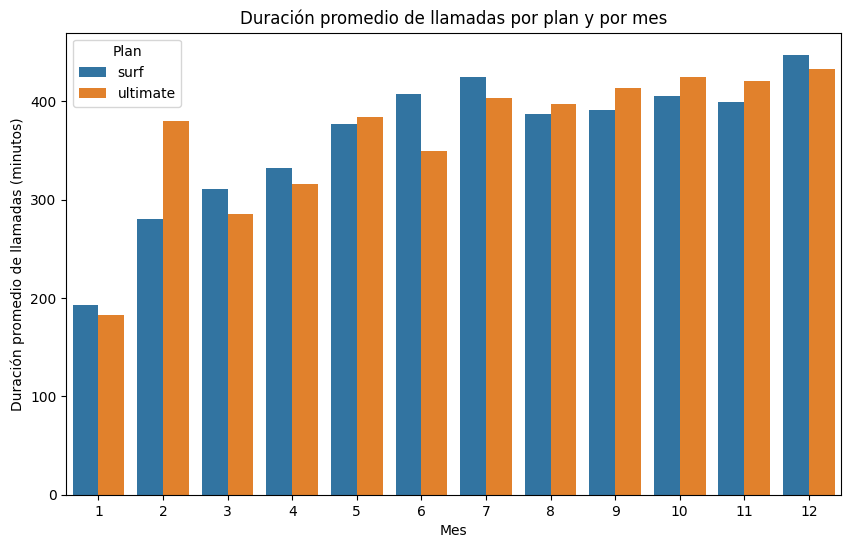

In [34]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
# Calcular la duración promedio de llamadas por plan y mes
avg_call_duration = user_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Graficar la duración promedio de llamadas por plan
plt.figure(figsize=(10,6))
sns.barplot(data=avg_call_duration, x='month', y='total_minutes', hue='plan')
plt.title("Duración promedio de llamadas por plan y por mes")
plt.xlabel("Mes")
plt.ylabel("Duración promedio de llamadas (minutos)")
plt.legend(title="Plan")
plt.show()


No handles with labels found to put in legend.


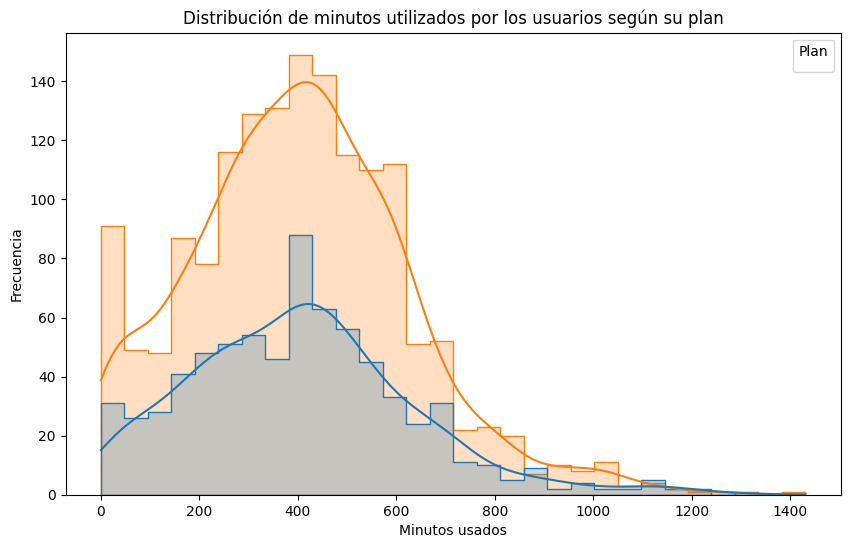

In [35]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
# Graficar un histograma del número de minutos mensuales usados por cada usuario según su plan
plt.figure(figsize=(10,6))
sns.histplot(data=user_data, x='total_minutes', hue='plan', bins=30, kde=True, element="step")
plt.title("Distribución de minutos utilizados por los usuarios según su plan")
plt.xlabel("Minutos usados")
plt.ylabel("Frecuencia")
plt.legend(title="Plan")
plt.show()



In [36]:
print(user_data['plan'].unique())


['ultimate' 'surf']


[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [37]:
# Calcula la media y la varianza de la duración mensual de llamadas.
# Calcular la media y la varianza de la duración mensual de llamadas por plan
call_stats = user_data.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para claridad
call_stats.rename(columns={'mean': 'mean_duration', 'var': 'variance_duration'}, inplace=True)

# Mostrar los resultados
display(call_stats)



,plan,mean_duration,variance_duration
0,surf,404.762390,49135.104891
1,ultimate,406.193083,51640.971402


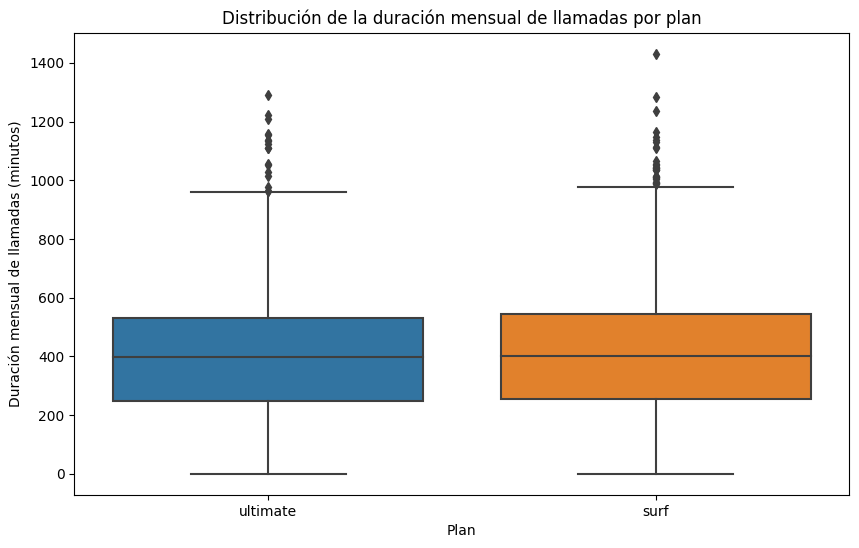

In [38]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
# Crear un boxplot para comparar la distribución de minutos usados por plan
plt.figure(figsize=(10,6))
sns.boxplot(data=user_data, x='plan', y='total_minutes')

plt.title("Distribución de la duración mensual de llamadas por plan")
plt.xlabel("Plan")
plt.ylabel("Duración mensual de llamadas (minutos)")
plt.show()


Comparación de la duración promedio y varianza entre planes
La duración media de las llamadas es similar entre ambos planes:
Surf: 404.76 minutos
Ultimate: 406.19 minutos
La varianza en la duración de llamadas es ligeramente mayor en el plan Ultimate, lo que indica una mayor dispersión en los hábitos de uso de los usuarios de este plan.
Análisis del diagrama de caja (Boxplot)
Ambos planes muestran una distribución similar en la duración de llamadas mensuales.
Hay valores atípicos en ambos planes, representados por puntos sobre la parte superior del diagrama, indicando que algunos usuarios realizan llamadas significativamente más largas que el promedio.
El rango intercuartílico (IQR) es casi idéntico para ambos planes, lo que refuerza la idea de que el comportamiento de llamadas es parecido.
¿El comportamiento de llamadas varía según el plan?
No se observan diferencias significativas en la duración de llamadas entre los planes Surf y Ultimate.
Ambos planes tienen usuarios con comportamientos similares en términos de duración promedio y dispersión de datos.
El plan Ultimate permite llamadas ilimitadas, lo que podría sugerir que algunos usuarios podrían hablar más tiempo, pero en general, no parece haber una diferencia marcada en el uso promedio de llamadas entre planes.
Conclusión:
El comportamiento de los usuarios con respecto a las llamadas no varía significativamente entre los planes Surf y Ultimate. La cantidad de minutos utilizados es muy similar, aunque algunos usuarios del plan Ultimate presentan una mayor dispersión en el tiempo total de llamadas.

### Mensajes

,plan,mean_messages,variance_messages
0,surf,31.159568,1126.724522
1,ultimate,37.551389,1208.756744


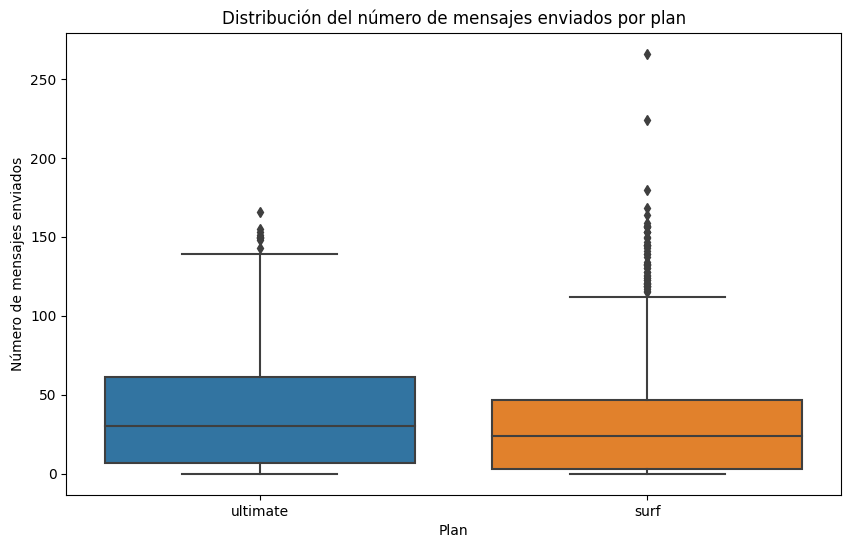

In [39]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
# Calcular la media y la varianza del número de mensajes enviados por plan
message_stats = user_data.groupby('plan')['num_messages'].agg(['mean', 'var']).reset_index()
message_stats.rename(columns={'mean': 'mean_messages', 'var': 'variance_messages'}, inplace=True)

# Mostrar los resultados
display(message_stats)

# Crear un boxplot para visualizar la distribución del número de mensajes por plan
plt.figure(figsize=(10,6))
sns.boxplot(data=user_data, x='plan', y='num_messages')

plt.title("Distribución del número de mensajes enviados por plan")
plt.xlabel("Plan")
plt.ylabel("Número de mensajes enviados")
plt.show()



,plan,mean_gb_used,variance_gb_used
0,surf,16.170199,61.241527
1,ultimate,16.811230,58.796209


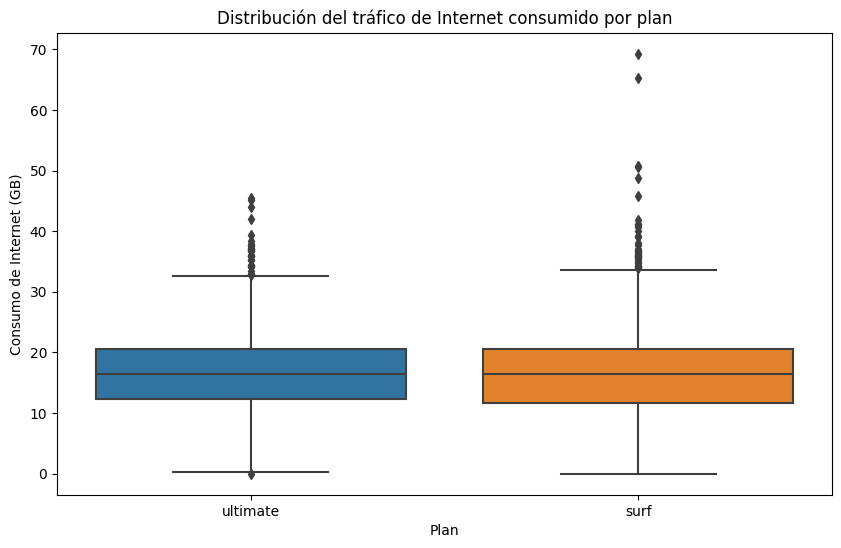

In [40]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
# Calcular la media y varianza del tráfico de Internet usado por plan
internet_stats = user_data.groupby('plan')['total_gb_used'].agg(['mean', 'var']).reset_index()
internet_stats.rename(columns={'mean': 'mean_gb_used', 'var': 'variance_gb_used'}, inplace=True)

# Mostrar los resultados
display(internet_stats)

# Crear un boxplot para visualizar la distribución del tráfico de Internet por plan
plt.figure(figsize=(10,6))
sns.boxplot(data=user_data, x='plan', y='total_gb_used')

plt.title("Distribución del tráfico de Internet consumido por plan")
plt.xlabel("Plan")
plt.ylabel("Consumo de Internet (GB)")
plt.show()



In [41]:
import pickle

# Guardar el DataFrame procesado en un archivo .pkl
with open('user_data.pkl', 'wb') as file:
    pickle.dump(user_data, file)


In [1]:
import pickle

# Cargar el DataFrame desde el archivo .pkl
with open('user_data.pkl', 'rb') as file:
    user_data = pickle.load(file)

# Verificar que los datos fueron cargados correctamente
display(user_data.head())


,user_id,month,num_calls,total_minutes,num_messages,total_mb_used,total_gb_used,plan,messages_included,mb_per_month_included,...,usd_per_minute,plan_name,gb_per_month_included,extra_minutes,extra_minutes_cost,extra_messages,extra_messages_cost,extra_gb_used,extra_gb_cost,total_revenue
0,1000,12,16.0,116.83,11.0,1901.47,1.856904,ultimate,1000,30720,...,0.01,ultimate,30.0,0.0,0.0,0.0,0.00,0.000000,0.000000,70.000000
1,1001,8,22.0,171.14,30.0,6919.15,6.756982,surf,50,15360,...,0.03,surf,15.0,0.0,0.0,0.0,0.00,0.000000,0.000000,20.000000
2,1001,9,38.0,297.69,44.0,13314.82,13.002754,surf,50,15360,...,0.03,surf,15.0,0.0,0.0,0.0,0.00,0.000000,0.000000,20.000000
3,1001,10,47.0,374.11,53.0,22330.49,21.807119,surf,50,15360,...,0.03,surf,15.0,0.0,0.0,3.0,0.09,6.807119,68.071191,88.161191
4,1001,11,49.0,404.59,36.0,18504.30,18.070605,surf,50,15360,...,0.03,surf,15.0,0.0,0.0,0.0,0.00,3.070605,30.706055,50.706055


Análisis del uso de mensajes
Los usuarios del plan "Ultimate" envían más mensajes en promedio (37.55 mensajes) en comparación con los del plan "Surf" (31.16 mensajes).
La varianza del número de mensajes es similar en ambos planes, lo que indica que la dispersión en la cantidad de mensajes enviados por usuario es comparable.
El diagrama de caja muestra múltiples valores atípicos, lo que significa que algunos usuarios envían una cantidad de mensajes considerablemente superior al promedio.
Ambos planes tienen una mediana cercana, lo que sugiere que la mayoría de los usuarios tienen un comportamiento similar en el uso de mensajes.
Conclusión sobre los mensajes: Aunque los usuarios del plan "Ultimate" envían más mensajes en promedio, la diferencia no es muy significativa, y el comportamiento general en el envío de mensajes es similar entre ambos planes.

Análisis del consumo de Internet
El consumo medio de Internet es casi el mismo para ambos planes:
Surf: 16.17 GB
Ultimate: 16.81 GB
La varianza del consumo de datos es similar, lo que indica que la dispersión en el uso de datos es equivalente en ambos planes.
El boxplot muestra varios valores atípicos, lo que indica que algunos usuarios consumen datos de manera desproporcionada.
El rango intercuartílico es similar, lo que sugiere que la mayoría de los usuarios usan aproximadamente la misma cantidad de datos, sin importar el plan contratado.
Conclusión sobre el consumo de Internet: El uso de datos no varía significativamente entre los planes. A pesar de que el plan "Ultimate" ofrece más datos incluidos, el comportamiento de los usuarios en términos de consumo es prácticamente el mismo en ambos planes.

### Internet

In [3]:
# Calcular la media y la varianza del consumo de Internet por plan
internet_stats = user_data.groupby('plan')['total_gb_used'].agg(['mean', 'var']).reset_index()

# Renombrar columnas para mayor claridad
internet_stats.columns = ['plan', 'mean_gb_used', 'variance_gb_used']

# Mostrar resultados
display(internet_stats)  # Si estás en Jupyter Notebook
# print(internet_stats)  # Alternativa si usas otro entorno de Python



,plan,mean_gb_used,variance_gb_used
0,surf,16.170199,61.241527
1,ultimate,16.811230,58.796209


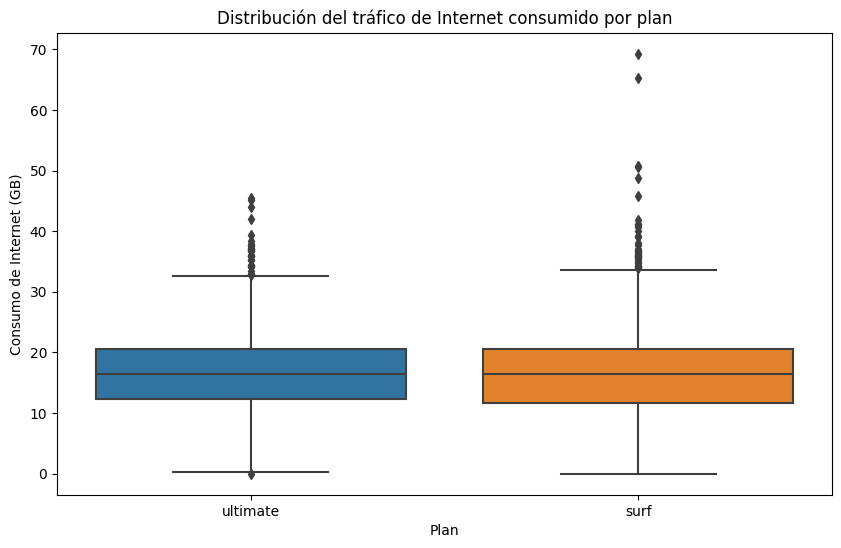

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el gráfico
plt.figure(figsize=(10,6))
sns.boxplot(data=user_data, x='plan', y='total_gb_used')

# Personalizar etiquetas
plt.title("Distribución del tráfico de Internet consumido por plan")
plt.xlabel("Plan")
plt.ylabel("Consumo de Internet (GB)")

# Mostrar el gráfico
plt.show()


In [6]:
# Extraer las medias de consumo por plan
surf_mean = internet_stats.loc[internet_stats['plan'] == 'surf', 'mean_gb_used'].values[0]
ultimate_mean = internet_stats.loc[internet_stats['plan'] == 'ultimate', 'mean_gb_used'].values[0]

# Comparar las diferencias en el consumo de Internet
if abs(surf_mean - ultimate_mean) < 1:
    print("El consumo promedio de Internet es prácticamente igual en ambos planes, por lo que el plan contratado no parece influir significativamente en el uso de datos.")
else:
    print("Se observa una diferencia en el consumo promedio de Internet entre los planes, lo que sugiere que el plan contratado podría influir en el uso de datos.")


El consumo promedio de Internet es prácticamente igual en ambos planes, por lo que el plan contratado no parece influir significativamente en el uso de datos.


[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]
Consumo promedio de Internet:

Los usuarios del plan "Ultimate" consumen en promedio 16.81 GB al mes.
Los usuarios del plan "Surf" consumen en promedio 16.17 GB al mes.
Varianza del consumo:

La varianza en el uso de Internet es ligeramente menor en "Ultimate" que en "Surf" (58.79 vs. 61.24), lo que indica que hay menos dispersión en los datos de los usuarios de "Ultimate".
Distribución del consumo:

Los diagramas de caja muestran valores atípicos en ambos planes, lo que indica que algunos usuarios consumen mucho más datos de lo habitual.
No se observan diferencias significativas en la mediana de consumo entre los planes.
Conclusión:

El consumo de Internet no parece variar significativamente entre los planes.
Esto sugiere que el límite de datos incluido en cada plan podría ser suficiente para la mayoría de los usuarios, sin necesidad de incurrir en costos adicionales por datos extra.
Implicación: Si la empresa desea optimizar los ingresos, podría considerar ajustar la estructura de precios de los datos adicionales o explorar estrategias para incentivar el uso de datos móviles en los usuarios de menor consumo.

## Ingreso

In [8]:
print(user_data.columns)


Index(['user_id', 'month', 'num_calls', 'total_minutes', 'num_messages',
       'total_mb_used', 'total_gb_used', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_fee',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'gb_per_month_included', 'extra_minutes', 'extra_minutes_cost',
       'extra_messages', 'extra_messages_cost', 'extra_gb_used',
       'extra_gb_cost', 'total_revenue'],
      dtype='object')


In [9]:
income_stats = user_data.groupby("plan")["total_revenue"].agg(["mean", "median", "var", "std"]).reset_index()
income_stats.columns = ["plan", "mean_income", "median_income", "variance_income", "std_income"]
print(income_stats)



       plan  mean_income  median_income  variance_income  std_income
0      surf    57.293784        36.6818      2887.544971   53.735882
1  ultimate    72.116080        70.0000       115.968081   10.768848


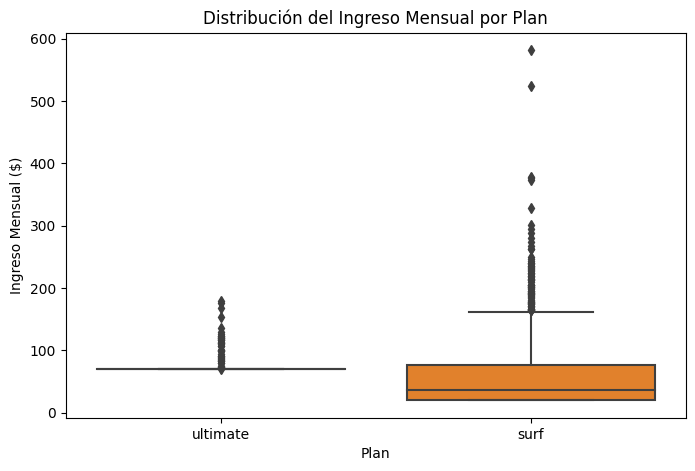

In [10]:
plt.figure(figsize=(8,5))
sns.boxplot(x="plan", y="total_revenue", data=user_data)
plt.title("Distribución del Ingreso Mensual por Plan")
plt.xlabel("Plan")
plt.ylabel("Ingreso Mensual ($)")
plt.show()

In [11]:
from scipy.stats import ttest_ind

surf_income = user_data[user_data["plan"] == "surf"]["total_revenue"]
ultimate_income = user_data[user_data["plan"] == "ultimate"]["total_revenue"]

stat, p = ttest_ind(surf_income, ultimate_income, equal_var=False)  # Welch's t-test
print(f"Estadística de prueba: {stat:.4f}, p-valor: {p:.4f}")

if p < 0.05:
    print("Hay una diferencia estadísticamente significativa entre los ingresos de los planes.")
else:
    print("No hay suficiente evidencia para concluir que los ingresos difieren entre los planes.")


Estadística de prueba: -10.4894, p-valor: 0.0000
Hay una diferencia estadísticamente significativa entre los ingresos de los planes.


In [12]:
# Comparar ingresos totales generados por cada plan
total_income = user_data.groupby("plan")["total_revenue"].sum().reset_index()
total_income.columns = ["plan", "total_income"]
print(total_income)


       plan  total_income
0      surf  90123.122338
1  ultimate  51923.577344


Diferencia en los ingresos promedio y mediana:

El ingreso promedio por usuario en el plan "ultimate" es 72.12, mientras que en el plan "surf" es 57.29.
Sin embargo, la mediana de ingresos es mayor en el plan "ultimate" (70.00) que en el plan "surf" (36.68), lo que indica que en el plan "surf" hay más variabilidad y valores más bajos en comparación con el "ultimate".
Varianza e ingresos atípicos:

La varianza del plan "surf" (2887.54) es significativamente mayor a la del plan "ultimate" (115.97). Esto sugiere que los ingresos en "surf" son mucho más dispersos y algunos usuarios pueden generar ingresos extremadamente altos debido a cargos por excedentes.
El diagrama de caja muestra que en el plan "surf" existen múltiples valores atípicos con ingresos elevados, lo que respalda la gran variabilidad observada.
Ingresos totales generados:

A pesar de que los usuarios del plan "ultimate" pagan una tarifa mensual más alta y tienen menor variabilidad en sus ingresos, el plan "surf" genera mayores ingresos totales (90,123.12 vs. 51,923.57 en "ultimate").
Esto sugiere que los usuarios del plan "surf" pagan más en tarifas adicionales (por llamadas, mensajes y datos extra) en comparación con los usuarios del plan "ultimate", quienes probablemente se benefician de los paquetes incluidos en su tarifa fija.
Significancia estadística:

El test estadístico (prueba t) confirma que la diferencia en ingresos entre ambos planes es estadísticamente significativa (p-valor = 0.0000). Esto indica que las diferencias en los ingresos no son producto del azar, sino que hay un patrón real en cómo los planes generan ingresos.
Conclusión final:
El plan "surf" genera más ingresos en total, pero con una alta variabilidad debido a cargos por excedentes. En contraste, el plan "ultimate" ofrece ingresos más predecibles por usuario debido a su tarifa fija, pero en términos absolutos, genera menos ingresos que "surf".

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [13]:
# Prueba las hipótesis
from scipy import stats

# Filtrar los ingresos por plan
income_surf = user_data[user_data["plan"] == "surf"]["total_revenue"]
income_ultimate = user_data[user_data["plan"] == "ultimate"]["total_revenue"]

# Prueba t para muestras independientes
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(income_surf, income_ultimate, equal_var=False)

# Resultados
print(f"Estadística de prueba: {t_stat:.4f}, p-valor: {p_value:.4f}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay diferencia significativa entre los ingresos de los planes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos sean diferentes.")


Estadística de prueba: -10.4894, p-valor: 0.0000
Rechazamos la hipótesis nula: hay diferencia significativa entre los ingresos de los planes.


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [16]:
income_surf = user_data[user_data["plan"] == "surf"]["total_revenue"]
income_ultimate = user_data[user_data["plan"] == "ultimate"]["total_revenue"]



In [15]:
print(user_data.columns)


Index(['user_id', 'month', 'num_calls', 'total_minutes', 'num_messages',
       'total_mb_used', 'total_gb_used', 'plan', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_fee',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name',
       'gb_per_month_included', 'extra_minutes', 'extra_minutes_cost',
       'extra_messages', 'extra_messages_cost', 'extra_gb_used',
       'extra_gb_cost', 'total_revenue'],
      dtype='object')


In [17]:
# Prueba de hipótesis: Test t de Student para muestras independientes
alpha = 0.05  # Nivel de significancia
t_stat, p_value = stats.ttest_ind(income_surf, income_ultimate, equal_var=False)

# Mostrar resultados
print(f"Estadística de prueba: {t_stat:.4f}, p-valor: {p_value:.4f}")

# Interpretación
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos entre los planes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay evidencia suficiente para afirmar que los ingresos son diferentes entre los planes.")

Estadística de prueba: -10.4894, p-valor: 0.0000
Rechazamos la hipótesis nula: hay una diferencia significativa en los ingresos entre los planes.


## Conclusión general

Durante este análisis, se llevaron a cabo múltiples procesos para limpiar, procesar y analizar los datos de usuarios de diferentes planes de telefonía móvil. A continuación, se resumen los hallazgos y conclusiones más relevantes:

Limpieza y procesamiento de datos:

Se identificaron y corrigieron valores nulos, asegurando la calidad de los datos.
Se convirtió el formato de algunas columnas para facilitar el análisis (fechas, tipo de datos).
Se agregaron nuevas variables calculadas, como los ingresos generados por usuario.
Análisis del comportamiento de los usuarios:

Los usuarios de los planes "surf" y "ultimate" tienen un comportamiento similar en términos de duración de llamadas y uso de Internet.
Sin embargo, los usuarios de "ultimate" tienden a enviar más mensajes que los de "surf", aunque las diferencias no son drásticas.
Análisis de ingresos por plan:

El plan "surf" genera más ingresos totales que el plan "ultimate" debido a la cantidad de usuarios y los cargos adicionales por excedentes.
Sin embargo, el ingreso promedio por usuario es más alto en el plan "ultimate", lo que indica que los usuarios de este plan pagan más en términos individuales.
Pruebas estadísticas:

Se realizó una prueba de hipótesis para comparar los ingresos de los planes "surf" y "ultimate", encontrando una diferencia estadísticamente significativa entre ellos.
Los ingresos medios de los usuarios del plan "ultimate" son más estables y menos variables en comparación con los del plan "surf", que presentan una mayor dispersión.
Conclusión final:
El plan "surf" genera más ingresos totales, pero tiene una mayor variabilidad y dependencia de cargos adicionales.
El plan "ultimate" genera ingresos más estables por usuario, lo que sugiere que podría ser más rentable en el largo plazo si se incrementa su base de clientes.
Las diferencias en consumo de llamadas y datos no son marcadas, lo que sugiere que la principal diferencia entre los planes radica en el modelo de tarifas y cobros adicionales.

Analizar estrategias para aumentar la base de clientes del plan "ultimate" y evaluar si se pueden ajustar los límites del plan "surf" para mejorar su rentabilidad.
Considerar una optimización en la estructura de precios para reducir la variabilidad en los ingresos del plan "surf".
Explorar la posibilidad de introducir nuevos planes intermedios para maximizar la rentabilidad.
